In [11]:
p_f = 2/3 #probability of using fair dice
p_l = 1/3 #probability of using loaded dice
x = list(range(11)) #n of appeared 6 or 5
p_xf = [] #probability of appearing x using fair dice
p_xl = [] #probability of appearing x using loaded dice
p_x = [] #probability of appearing x = p_xf * p_f + p_xl * p_l
p_fx = [] #probability of using fair dice given x appearances = p_xf * p_f / p_x
p_lx = [] #probability of using loaded dice given x appearances = p_xl * p_l / p_x

def choose(n, k):
    """
    A fast way to calculate binomial coefficients by Andrew Dalke (contrib).
    Source: https://stackoverflow.com/questions/3025162/statistics-combinations-in-python
    """
    
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

In [12]:
import numpy as np
for i in x:
    """
    Calculate probabilities
    """
    p_xf.append(choose(10,i)*(1/6)**i*(5/6)**(10-i))
    p_xl.append(choose(10,i)*(0.04)**i*(0.96)**(10-i))
    p_x.append(p_xf[i]*p_f + p_xl[i]*p_l)
 

In [20]:
import pandas as pd
p_fx = [i*p_f / j for i, j  in zip(p_xf, p_x)]
p_lx = [i*p_l / j for i, j  in zip(p_xl, p_x)]

#pd.DataFrame(list(zip(x, p_fx, p_lx)), columns=['X','P(F|X)', 'P(L|X)'])

,X,P(F|X),P(L|X)
0,0,0.326986,6.730139e-01
1,1,0.699889,3.001114e-01
2,2,0.917993,8.200713e-02
3,3,0.981729,1.827102e-02
4,4,0.996138,3.862329e-03
5,5,0.999193,8.071197e-04
6,6,0.999832,1.682574e-04
7,7,0.999965,3.505830e-05
8,8,0.999993,7.304016e-06
9,9,0.999998,1.521679e-06


### Probability Conclusion
#### It turns out that the players should always guess a fair dice except when the given number of 6 (or 5) is 0 because of a larger probability of having fair dice given the number of appearances.

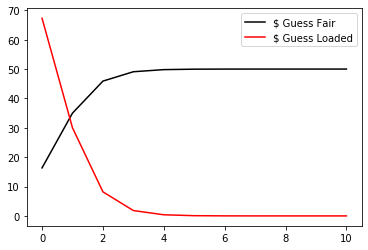

In [31]:
money_sam_f = []
money_sam_l = []

for i in p_fx:
    money_sam_f.append(i*50)
for i in p_lx:
    money_sam_l.append(i*100)
    
plt.plot(x,money_sam_f,label="$ Guess Fair",c="black")
plt.plot(x,money_sam_l,label="$ Guess Loaded",c="red")
plt.legend() 

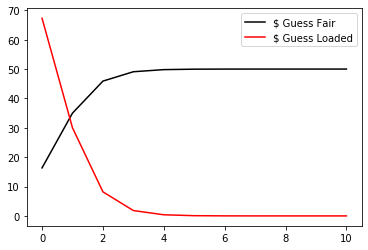

In [28]:
money_kim_f = []
money_kim_l = []

for i in p_fx:
    money_kim_f.append(i*50)
for i in p_lx:
    money_kim_l.append(i*100)
    
plt.plot(x,money_kim_f,label="$ Guess Fair",c="black")
plt.plot(x,money_kim_l,label="$ Guess Loaded",c="red")
plt.legend() 

### Playing Strategy:
#### Both Sam and Kim should always guess fair dice unless the given number of appearances is 0. Therefore, plan A or B should yield same profit for players.  